# ABOUT:
- this notebook generates some plots to explore **how item scores affect the AmpBPR Loss Values**

In [1]:
import seaborn as sb
from numpy import exp,log
from numpy.random import rand, uniform
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def softplus(x):
    return log(exp(x)+1)
def OriginalBPR(pos,neg):
    x = -(pos - neg)
    return softplus(x)
def AmpBPR1(pos,neg,w):
    x = -(pos - neg)*w
    return softplus(x)
def AmpBPR2(pos,neg,w):
    x = -(pos - neg*w)
    return softplus(x)

In [3]:
neg_weight = 1.5
outputs = {
    "trial":[],
    "loss":[],
    "loss_type":[],
    "pos_score":[],
    "neg_score":[]
}
for trial in range(100):
    pos_score, neg_score = rand(2)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("OriginalBPR")
    outputs["loss"].append(OriginalBPR(pos_score, neg_score))
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR1")
    outputs["loss"].append(AmpBPR1(pos_score, neg_score,neg_weight))
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR2")
    outputs["loss"].append(AmpBPR2(pos_score, neg_score,neg_weight))
data = pd.DataFrame(outputs)
data

,trial,loss,loss_type,pos_score,neg_score
0,0,0.732646,OriginalBPR,0.644649,0.722145
1,0,0.752957,AmpBPR1,0.644649,0.722145
2,0,0.936284,AmpBPR2,0.644649,0.722145
3,1,0.898395,OriginalBPR,0.568375,0.943833
4,1,1.013875,AmpBPR1,0.568375,0.943833
...,...,...,...,...,...
295,98,1.118727,AmpBPR1,0.443403,0.925516
296,98,1.273261,AmpBPR2,0.443403,0.925516
297,99,1.113426,OriginalBPR,0.276525,0.991811
298,99,1.367094,AmpBPR1,0.276525,0.991811


## Visualisation 1:
- **How do positive and negative item scores affect the loss values?**

[Text(0.5, 0, 'Difference between positive and negative item score')]

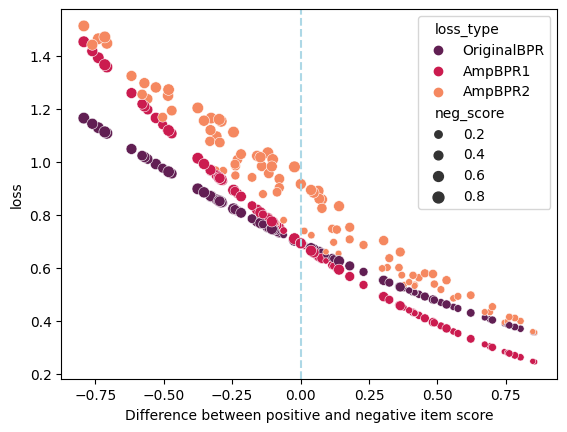

In [4]:
p = sb.scatterplot(data = data, x = data['pos_score'] - data['neg_score'], y = "loss", hue = "loss_type", size = "neg_score", palette = "rocket")
p.axvline(0,0,2, linestyle = "--", color = "lightblue")
p.set(xlabel = "Difference between positive and negative item score")

In [5]:
neg_weight = 1.5
outputs = {
    "trial":[],
    "loss":[],
    "loss_type":[],
    "pos_score":[],
    "neg_score":[]
}
for trial in range(100):
    pos_score, neg_score = rand(2)
    pos_score = 0.5
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("OriginalBPR")
    outputs["loss"].append(OriginalBPR(pos_score, neg_score))
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR1")
    outputs["loss"].append(AmpBPR1(pos_score, neg_score,neg_weight))
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR2")
    outputs["loss"].append(AmpBPR2(pos_score, neg_score,neg_weight))
data = pd.DataFrame(outputs)
data

,trial,loss,loss_type,pos_score,neg_score
0,0,0.495369,OriginalBPR,0.5,0.055437
1,0,0.414310,AmpBPR1,0.5,0.055437
2,0,0.506290,AmpBPR2,0.5,0.055437
3,1,0.842156,OriginalBPR,0.5,0.778666
4,1,0.923830,AmpBPR1,0.5,0.778666
...,...,...,...,...,...
295,98,0.923488,AmpBPR1,0.5,0.778288
296,98,1.081543,AmpBPR2,0.5,0.778288
297,99,0.670153,OriginalBPR,0.5,0.453470
298,99,0.658859,AmpBPR1,0.5,0.453470


## Visualisation 2:
- **How do positive and negative item scores affect the loss values?**
    - Increasing negative item scores increase loss
    - AmpBPR2 produces higher loss values than OriginalBPR at all levels of negative item score
    - AmpBPR2 only produces higher loss values than OriginalBPR when negative item scores are higher than positive item scores
    
- note: positive item score is fixed at 0.5 while negative weights are fixed at 1.5

[Text(0.5, 0, 'Negative item score')]

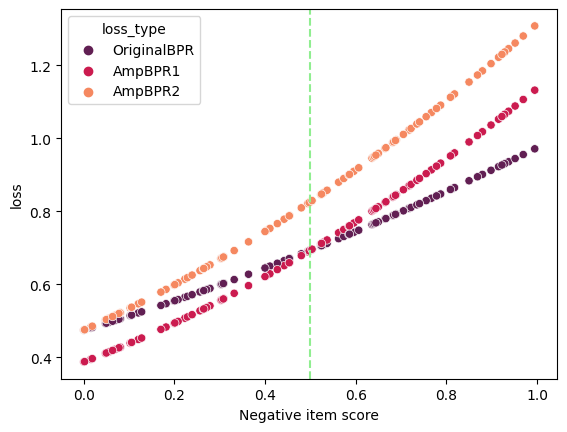

In [6]:
p = sb.scatterplot(data = data, x = data['neg_score'], y = "loss", hue = "loss_type", palette = "rocket")
p.axvline(0.5,0,2, linestyle = "--", color = "lightgreen")
p.set(xlabel = "Negative item score")

In [19]:
outputs = {
    "trial":[],
    "loss":[],
    "loss_type":[],
    "pos_score":[],
    "neg_score":[],
    "neg_weight":[]
}
for trial in range(100):
    pos_score, neg_score = rand(2)
    neg_weight = uniform(1,3)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("OriginalBPR")
    outputs["loss"].append(OriginalBPR(pos_score, neg_score))
    outputs["neg_weight"].append(1)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR1")
    outputs["loss"].append(AmpBPR1(pos_score, neg_score, neg_weight))
    outputs["neg_weight"].append(neg_weight)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR2")
    outputs["loss"].append(AmpBPR2(pos_score, neg_score, neg_weight))
    outputs["neg_weight"].append(neg_weight)
    
data = pd.DataFrame(outputs)
data

,trial,loss,loss_type,pos_score,neg_score,neg_weight
0,0,0.751991,OriginalBPR,0.786416,0.900833,1.000000
1,0,0.772596,AmpBPR1,0.786416,0.900833,1.337635
2,0,0.924173,AmpBPR2,0.786416,0.900833,1.337635
3,1,0.584723,OriginalBPR,0.328363,0.098313,1.000000
4,1,0.480844,AmpBPR1,0.328363,0.098313,2.095959
...,...,...,...,...,...,...
295,98,0.748262,AmpBPR1,0.775798,0.817809,2.555272
296,98,1.551969,AmpBPR2,0.775798,0.817809,2.555272
297,99,0.768138,OriginalBPR,0.421995,0.566742,1.000000
298,99,0.819409,AmpBPR1,0.421995,0.566742,1.646688


## Visualisation 3:
- **How do negative item weights affect the loss values?**

[Text(0.5, 0, 'Difference between positive and negative item score')]

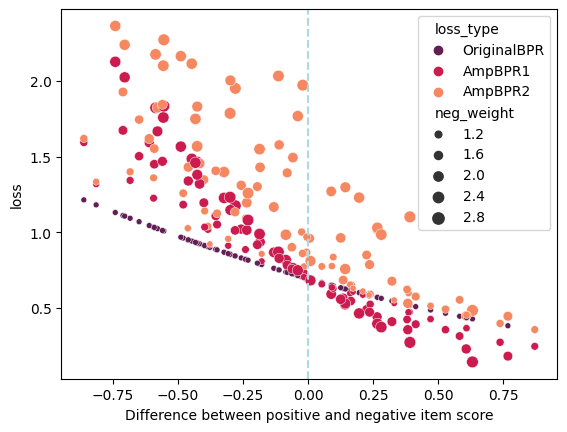

In [12]:
p = sb.scatterplot(data = data, x = data['pos_score'] - data['neg_score'], y = "loss", hue = "loss_type", size = "neg_weight", palette = "rocket")
p.axvline(0,0,2, linestyle = "--", color = "lightblue")
p.set(xlabel = "Difference between positive and negative item score")

In [7]:
outputs = {
    "trial":[],
    "loss":[],
    "loss_type":[],
    "pos_score":[],
    "neg_score":[],
    "neg_weight":[]
}
for trial in range(100):
    pos_score, neg_score = rand(2)
    pos_score = 0.5
    neg_weight = uniform(1,3)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("OriginalBPR")
    outputs["loss"].append(OriginalBPR(pos_score, neg_score))
    outputs["neg_weight"].append(1)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR1")
    outputs["loss"].append(AmpBPR1(pos_score, neg_score, neg_weight))
    outputs["neg_weight"].append(neg_weight)
    
    outputs["trial"].append(trial)
    outputs["pos_score"].append(pos_score)
    outputs["neg_score"].append(neg_score)
    outputs["loss_type"].append("AmpBPR2")
    outputs["loss"].append(AmpBPR2(pos_score, neg_score, neg_weight))
    outputs["neg_weight"].append(neg_weight)
    
data = pd.DataFrame(outputs)
data

,trial,loss,loss_type,pos_score,neg_score,neg_weight
0,0,0.929248,OriginalBPR,0.5,0.926968,1.000000
1,0,1.500638,AmpBPR1,0.5,0.926968,2.923729
2,0,2.314274,AmpBPR2,0.5,0.926968,2.923729
3,1,0.888148,OriginalBPR,0.5,0.858111,1.000000
4,1,0.925458,AmpBPR1,0.5,0.858111,1.174771
...,...,...,...,...,...,...
295,98,0.411128,AmpBPR1,0.5,0.135707,1.856350
296,98,0.576781,AmpBPR2,0.5,0.135707,1.856350
297,99,0.520899,OriginalBPR,0.5,0.119530,1.000000
298,99,0.426678,AmpBPR1,0.5,0.119530,1.657982


## Visualisation 4:
- **How do negative item weights affect the loss values?**
    - when negative item weights increase AmpBPR produces a larger loss values, especially when negative item scores are greater than positive item scores
    
- note: positive item weights are fixed at 0.5

[Text(0.5, 0, 'Negative item score')]

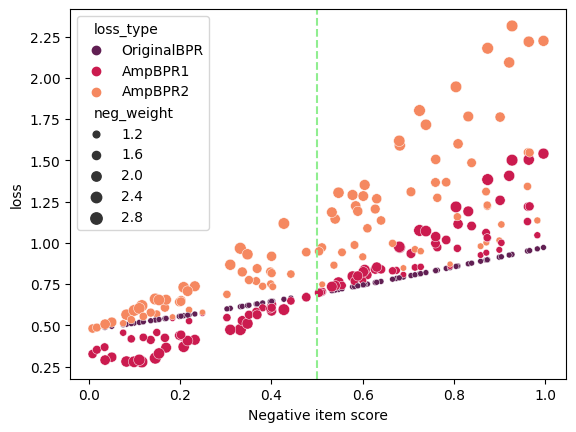

In [12]:
p = sb.scatterplot(data = data, x = data['neg_score'], y = "loss", hue = "loss_type", size = "neg_weight", palette = "rocket")
p.axvline(0.5,0,2, linestyle = "--", color = "lightgreen")
p.set(xlabel = "Negative item score")